In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import cv2 


In [2]:
img = cv2.imread('reftest.jpg')

lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
L = np.array([])
A = np.array([])
B = np.array([])
#ret, b = cv2.threshold(img,128,255,cv2.THRESH_BINARY)
#th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\cv2.THRESH_BINARY,11,2)
#rgb to lab 
l = lab[:,:,0]
l = l.reshape(l.shape[0]*l.shape[1])
a = lab[:,:,1]
a = a.reshape(a.shape[0]*a.shape[1])
b = lab[:,:,2]
b = b.reshape(b.shape[0]*b.shape[1])
L = np.append(L,l)
A = np.append(A,a)
B = np.append(B,b)

li=L.reshape(lab.shape[0],lab.shape[1])
ai=A.reshape(lab.shape[0],lab.shape[1])
bi=B.reshape(lab.shape[0],lab.shape[1])
# set green and red channels to 0
#print(li)
#plt.imshow(bi,"gray")



In [15]:
img=li.copy()
rp=[1,0.8,0.5]
f1=np.array([1,-1])
f2=np.array([[1],[-1]])
height, width = img.shape[:2]

pyramid=[]
for i in range(3):
    res = cv2.resize(img,(rp[0]*width, rp[0]*height), interpolation = cv2.INTER_CUBIC)
    dst = cv2.filter2D(res,-1,f1)
    dst=dst*(-1)
         
        

[[-0. -0. -0. ...  1.  1. -0.]
 [-0. -0. -0. ... -1. -1. -0.]
 [-0. -0. -0. ... -1. -1. -1.]
 ...
 [-0. -0. -0. ... -0. -0. -0.]
 [-0. -0. -0. ...  1.  1.  1.]
 [-0. -0. -0. ...  1.  1.  1.]]


In [1]:
a=[0,0.8,0.5]
it=np.nditer(a, [],['writeonly', 'updateifcopy'],casting='unsafe',op_dtypes=[np.dtype('f4')])
with it:
    for x in it:
        if x>0:
        x=x*(-1)
        else:
        x=x

IndentationError: expected an indented block (<ipython-input-1-9fe804c12909>, line 6)

In [3]:
# Gaussian Pyramid
def pyramid(lar):
    layer = lar.copy()
    gaussian_pyramid = [layer]
    for i in range(3):
                layer = cv2.pyrDown(layer)
                gaussian_pyramid.append(layer)

    # Laplacian Pyramid
    layer = gaussian_pyramid[2]
    lp = [layer]

    for i in range(2, 0, -1):
                size = (gaussian_pyramid[i - 1].shape[1], gaussian_pyramid[i - 1].shape[0])
                gaussian_expanded = cv2.pyrUp(gaussian_pyramid[i], dstsize=size)
                lap = cv2.subtract(gaussian_pyramid[i - 1], gaussian_expanded)
                #lap = cv2.Laplacian(lap,cv2.CV_64F)
                lp.append(lap)



    rc = lp[0]
    for i in range(1,3):
        size = (lp[i].shape[1], lp[i].shape[0])
        rc = cv2.pyrUp(rc, dstsize=size)
        rc = cv2.add(rc, lp[i])


        #li1 = cv2.Laplacian(li,cv2.CV_64F)
    layer=rc
    py=[layer]
    ii=0
    for i in range(3,8,2):
            rc  = cv2.GaussianBlur(rc,(i,i),1)
            rc1 = cv2.Laplacian(rc,cv2.CV_64F)
            rc1=np.asarray(rc1,dtype=np.uint8)
            kernel = np.ones((2,2),np.uint8)
            th3 = cv2.morphologyEx(rc1, cv2.MORPH_OPEN, kernel)
            th3 = cv2.dilate(th3,kernel,iterations = 1)
            py.append(th3)
            ii=ii+1

    return py
       
   

In [4]:
def dof(k):
    k[1]=np.multiply(k[1],0.4)
    k[2]=np.multiply(k[2],0.6)
    ad=np.add(k[1],k[2])
    ad=ad*k[3]
    return ad



/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/image.py:388: RuntimeWarning: invalid value encountered in subtract
  A_scaled -= a_min


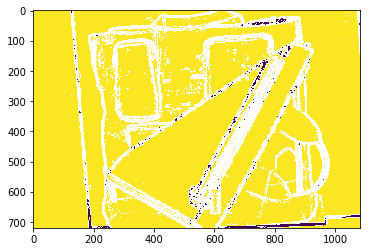

In [5]:
k=pyramid(li)
k1=pyramid(ai)
k2=pyramid(bi)
d1=dof(k)
d2=dof(k1)
d3=dof(k2)
w=d1.shape[0]
h=d1.shape[1]
s=np.sum(d1)
th=s/(w*h)
k=np.heaviside(d1,th)
k1=np.heaviside(d2,th/1.5)
k2=np.heaviside(d3,(th/1.5)/1.5)
e1=cv2.bitwise_or(k,k1)
bg=cv2.bitwise_or(e1,k2)
#k= cv2.adaptiveThreshold(k,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,11,2)
plt.imshow(bg)

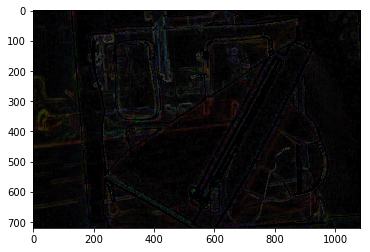

In [51]:
sobelx64 = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely64 = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
abs_sobelx = np.absolute(sobelx64)
sobelx = np.uint8(abs_sobelx)
abs_sobely = np.absolute(sobely64)
sobely = np.uint8(abs_sobely)
#x=np.square(sobelx64)
#y=np.square(sobely64)
#s=np.add(x,y)
#s=np.sqrt(s)
#maxval = np.amax(s,axis=0)
abs_dx = cv2.convertScaleAbs(sobelx)
abs_dy = cv2.convertScaleAbs(sobely)
mag = abs_dx + abs_dy
#idx=cv2.findNonZero(mag)
#Point pnt = locations[i];
#retval, dst=cv2.threshold(mag, 0.3,1,type=cv2.THRESH_BINARY_INV)
#retval, dst1=cv2.threshold(mag, 0.05,1,type=cv2.THRESH_BINARY)
#n=np.zeros((720,1083), dtype=np.uint8)
#t=np.ones((720,1083) ,dtype=np.uint8)
mag=np.where(mag>80,0,mag)
#mag=np.where(mag<30,0,mag)
kernel = np.ones((3,3),np.uint8)
th3 = cv2.morphologyEx(mag, cv2.MORPH_OPEN, kernel)
#mag=np.where(th3<10,0,th3)
#th3 = cv2.dilate(th3,kernel,iterations = 1)
plt.imshow(th3)


In [53]:
#mag = abs_dx + abs_dy
#mag=np.where(mag>30,0,mag)
#plt.imshow(mag)
#mag=np.where(mag<30,0,mag)
#plt.imshow(mag)
#print(sobelx64)
#print(np.all(mag==1))
#plt.imshow(mag.shape[0],"gray")

[[[  0.   0.   0.]
  [  4.   4.   4.]
  [  4.   4.   4.]
  ...
  [  6.  -6.  -6.]
  [ 12.  -4.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  4.   4.   4.]
  [  4.   4.   4.]
  ...
  [  4.  -8.  -8.]
  [ 10.  -3.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  4.   4.   4.]
  [  4.   4.   4.]
  ...
  [  1. -12. -10.]
  [  6.  -1.   0.]
  [  0.   0.   0.]]

 ...

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  4.   4.   4.]
  ...
  [ -3.  -6.  -6.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  4.   4.   4.]
  ...
  [ -3.  -4.  -4.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  4.   4.   4.]
  ...
  [ -2.  -2.  -2.]
  [  0.   0.   0.]
  [  0.   0.   0.]]]
